<a href="https://colab.research.google.com/github/davidanagy/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/davidanagy/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

df.head()

# !pip install pandas==0.23.4

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [18]:
# Weight seems to make the most sense as a dependent variable. We would expect weight to go down as exercise time goes up--but what effect does age have?

pd.crosstab(df['exercise_time'], df['weight']) # This is useless; I need bins for both columns.

weight_bins = pd.cut(df['weight'], 5)

time_bins = pd.cut(df['exercise_time'], 5)

ct1 = pd.crosstab(time_bins, weight_bins, normalize='columns')
ct1

# Data is a little messy. The lowest weights have a high % of people with lots of exercise, and the highest weight has 0% of such people, though the sample is small.
# However, looking at those who don't exercise, their percentage at the highest weight goes *down*--and the second-least-exercise group has similarly messy data.
# So what effect does age have?

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
exercise_time,,,,,
"(-0.3, 60.0]",0.141333,0.131343,0.236434,0.424581,0.830189
"(60.0, 120.0]",0.173333,0.226866,0.360465,0.407821,0.169811
"(120.0, 180.0]",0.189333,0.200000,0.217054,0.162011,0.000000
"(180.0, 240.0]",0.210667,0.220896,0.147287,0.005587,0.000000
"(240.0, 300.0]",0.285333,0.220896,0.038760,0.000000,0.000000


In [20]:
age_bins = pd.cut(df['age'], 5)

ct2 = pd.crosstab(age_bins, weight_bins, normalize='columns')
ct2

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
age,,,,,
"(17.938, 30.4]",0.213333,0.256716,0.189922,0.189944,0.132075
"(30.4, 42.8]",0.277333,0.185075,0.189922,0.173184,0.132075
"(42.8, 55.2]",0.208000,0.185075,0.189922,0.145251,0.150943
"(55.2, 67.6]",0.141333,0.211940,0.174419,0.245810,0.169811
"(67.6, 80.0]",0.160000,0.161194,0.255814,0.245810,0.415094


In [21]:
ct3 = pd.crosstab(age_bins, time_bins, normalize='columns')
ct3 # The relationships still aren't clear to me. I'm going to try more things.

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
age,,,,,
"(17.938, 30.4]",0.187050,0.145570,0.242152,0.317708,0.225131
"(30.4, 42.8]",0.187050,0.174051,0.188341,0.244792,0.298429
"(42.8, 55.2]",0.147482,0.132911,0.174888,0.177083,0.350785
"(55.2, 67.6]",0.165468,0.224684,0.179372,0.213542,0.125654
"(67.6, 80.0]",0.312950,0.322785,0.215247,0.046875,0.000000


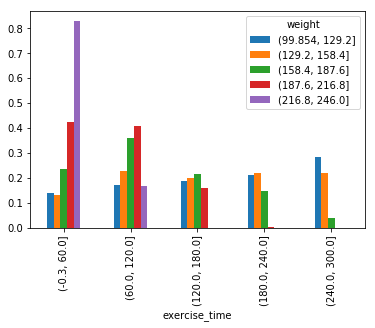

In [22]:
ct1.plot(kind='bar');

In [23]:
ct4 = pd.crosstab(weight_bins, [time_bins, age_bins], normalize='columns')
ct4

exercise_time     (-0.3, 60.0]      ...       (240.0, 300.0]
age             (17.938, 30.4]      ...         (55.2, 67.6]
weight                              ...                     
(99.854, 129.2]       0.192308      ...             0.458333
(129.2, 158.4]        0.134615      ...             0.500000
(158.4, 187.6]        0.211538      ...             0.041667
(187.6, 216.8]        0.326923      ...             0.000000
(216.8, 246.0]        0.134615      ...             0.000000

[5 rows x 24 columns]

In [30]:
ct5 = ct4.iloc[:, [0,1,2,3,4]]
ct5

exercise_time     (-0.3, 60.0]     ...                  
age             (17.938, 30.4]     ...      (67.6, 80.0]
weight                             ...                  
(99.854, 129.2]       0.192308     ...          0.241379
(129.2, 158.4]        0.134615     ...          0.160920
(158.4, 187.6]        0.211538     ...          0.218391
(187.6, 216.8]        0.326923     ...          0.206897
(216.8, 246.0]        0.134615     ...          0.172414

[5 rows x 5 columns]

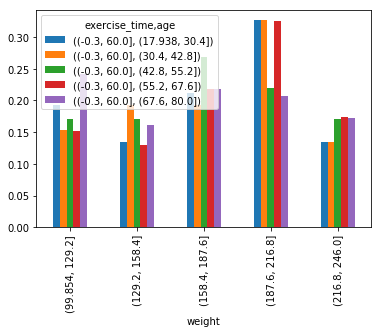

In [31]:
ct5.plot(kind='bar'); # I think it would be more helpful to switch time and age.

In [32]:
ct6 = pd.crosstab(weight_bins, [age_bins, time_bins], normalize='columns')
ct6

age             (17.938, 30.4]      ...         (67.6, 80.0]
exercise_time     (-0.3, 60.0]      ...       (180.0, 240.0]
weight                              ...                     
(99.854, 129.2]       0.192308      ...             0.555556
(129.2, 158.4]        0.134615      ...             0.444444
(158.4, 187.6]        0.211538      ...             0.000000
(187.6, 216.8]        0.326923      ...             0.000000
(216.8, 246.0]        0.134615      ...             0.000000

[5 rows x 24 columns]

In [44]:
age_bins2 = pd.cut(df['age'], 3)
time_bins2 = pd.cut(df['exercise_time'], 3)
weight_bins2 = pd.cut(df['weight'], 3)
ct7 = pd.crosstab(weight_bins2, [age_bins2, time_bins2], normalize='columns')
ct7

# By reducing the number of bins, I think this shows the relationships the clearest. Regardless of age, the low weight goes up as exercise time does,
# the middle weight is more of a standard distribution vis-a-vis exercise time, and the highest weight goes down as exercise time increases
# (and is notably nonexistent for the largest exercise time).

age                (17.938, 38.667]      ...       (59.333, 80.0]
exercise_time         (-0.3, 100.0]      ...       (200.0, 300.0]
weight                                   ...                     
(99.854, 148.667]          0.354167      ...             0.692308
(148.667, 197.333]         0.354167      ...             0.307692
(197.333, 246.0]           0.291667      ...             0.000000

[3 rows x 9 columns]

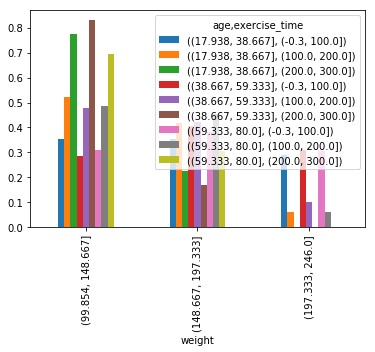

In [45]:
ct7.plot(kind='bar') # This is not what I want. I have to flip the axes.

In [50]:
ct8 = pd.crosstab([age_bins2, time_bins2], weight_bins2, normalize='columns')
ct8

weight                           (99.854, 148.667]        ...         (197.333, 246.0]
age              exercise_time                            ...                         
(17.938, 38.667] (-0.3, 100.0]            0.085284        ...                 0.232044
                 (100.0, 200.0]           0.130435        ...                 0.049724
                 (200.0, 300.0]           0.172241        ...                 0.000000
(38.667, 59.333] (-0.3, 100.0]            0.058528        ...                 0.209945
                 (100.0, 200.0]           0.086957        ...                 0.060773
                 (200.0, 300.0]           0.210702        ...                 0.000000
(59.333, 80.0]   (-0.3, 100.0]            0.123746        ...                 0.403315
                 (100.0, 200.0]           0.102007        ...                 0.044199
                 (200.0, 300.0]           0.030100        ...                 0.000000

[9 rows x 3 columns]

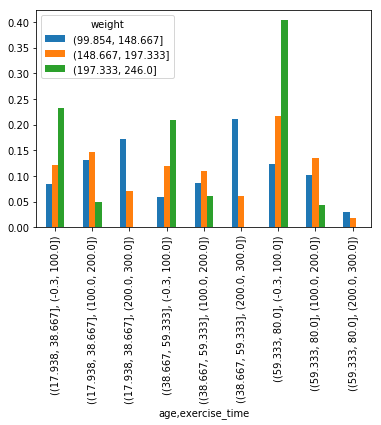

In [51]:
ct8.plot(kind='bar');

# For all ages, the highest weight class drops dramatically once they get a moderate amount of exercise (and disappears entirely with a lot of exercise).
# The lowest age class conforms to my hypothesis: the lowest weight class rises as exercise time goes up, while the moderate weight class is more of a bell curve.
# The medium age class mostly conforms to my hypothesis, except the moderate weight class dips slightly as exercise goes from low to medium.
# The oldest age class is interesting in that the percentage of old people of *any* weight drops as exercise increases. This is likely because older people
# are less likely to exercise, period--see above crosstabs.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

In this context, they're all continuous; each variable takes on
a bunch of different values.

2.  What are the relationships between the variables?

Weight and exercise time have a negative correlation, as do age and exercise
time. Age and weight have a positive correlation, albeit a messy one.

3.  Which relationships are "real", and which spurious?

The first two are "real." The fact that older people tend to be more overweight
is explained by the fact that they're also more likely to exercise less.
On the other hand, it makes sense that exercise (on average) reduces one's
weight, and that as one gets older one is (on average) less likely to exercise.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)